# Lecture 23.

## Combining Pandas with APIs and Statistics.

With all your experience in quantitative analysis, you decide to start your own wealth management firm. Your first client is a family member who wants you to evaluate their long-term retirement goals. Your initial analysis indicates that their portfolio might generate outsized returns that will enable retirement in five years. However, a chance still exists that the market will collapse, preventing early retirement. How do you measure the likelihood, or probability, of that uncertain future scenario?

We can use the Pandas library and data that we get via APIs to make predictions about the future performance of a portfolio. However, the fact that no single outcome exists complicates this process. Rather, a range of possible outcomes exists. And in this range, some outcomes are more likely to occur—that is, they’re more probable—than others.

In this lesson, you’ll measure the probability of financial outcomes by combining Pandas functions, APIs, and statistical concepts. Applying statistics—like probabilities, probability distributions, and confidence intervals—to portfolio analysis will improve how you manage portfolios and make financial decisions.

# Using Probability to Make Financial Projections.

`Probability` is a concept in statistics that describes the chance that a particular event will happen.

In finance, we associate probability with the movement of a stock price. A stock price can increase or decrease, and the magnitude of that change also varies. The change in a stock price always remains uncertain. However, by analyzing the past movements in a stock price, we can estimate the likely change in a stock price in both the near-term and the long-term future.

In this section, we’ll explore probability and related statistical concepts that help us make predictions about the movement in an asset’s price. First, we’ll discuss the probability distribution, which is key to estimating possible future outcomes of stock and portfolio performance.

# What’s a Probability Distribution?

A probability distribution is a mathematical function that allows us to visualize the likelihood of probable outcomes for a particular event.

The most-common probability distribution is the normal distribution. Probability distributions such as the normal distribution help us make educated guesses about what might happen to the performance of a stock, bond, or portfolio in the future, especially the near-term future.

# What’s a Normal Distribution?

Various real-world scenarios, from test scores to the daily returns of a stock over time, use the normal distribution. People commonly refer to the normal distribution as the bell curve. It describes a dataset where values that lie further from the mean occur less frequently than those that lie closer to the mean. The following image illustrates this concept:

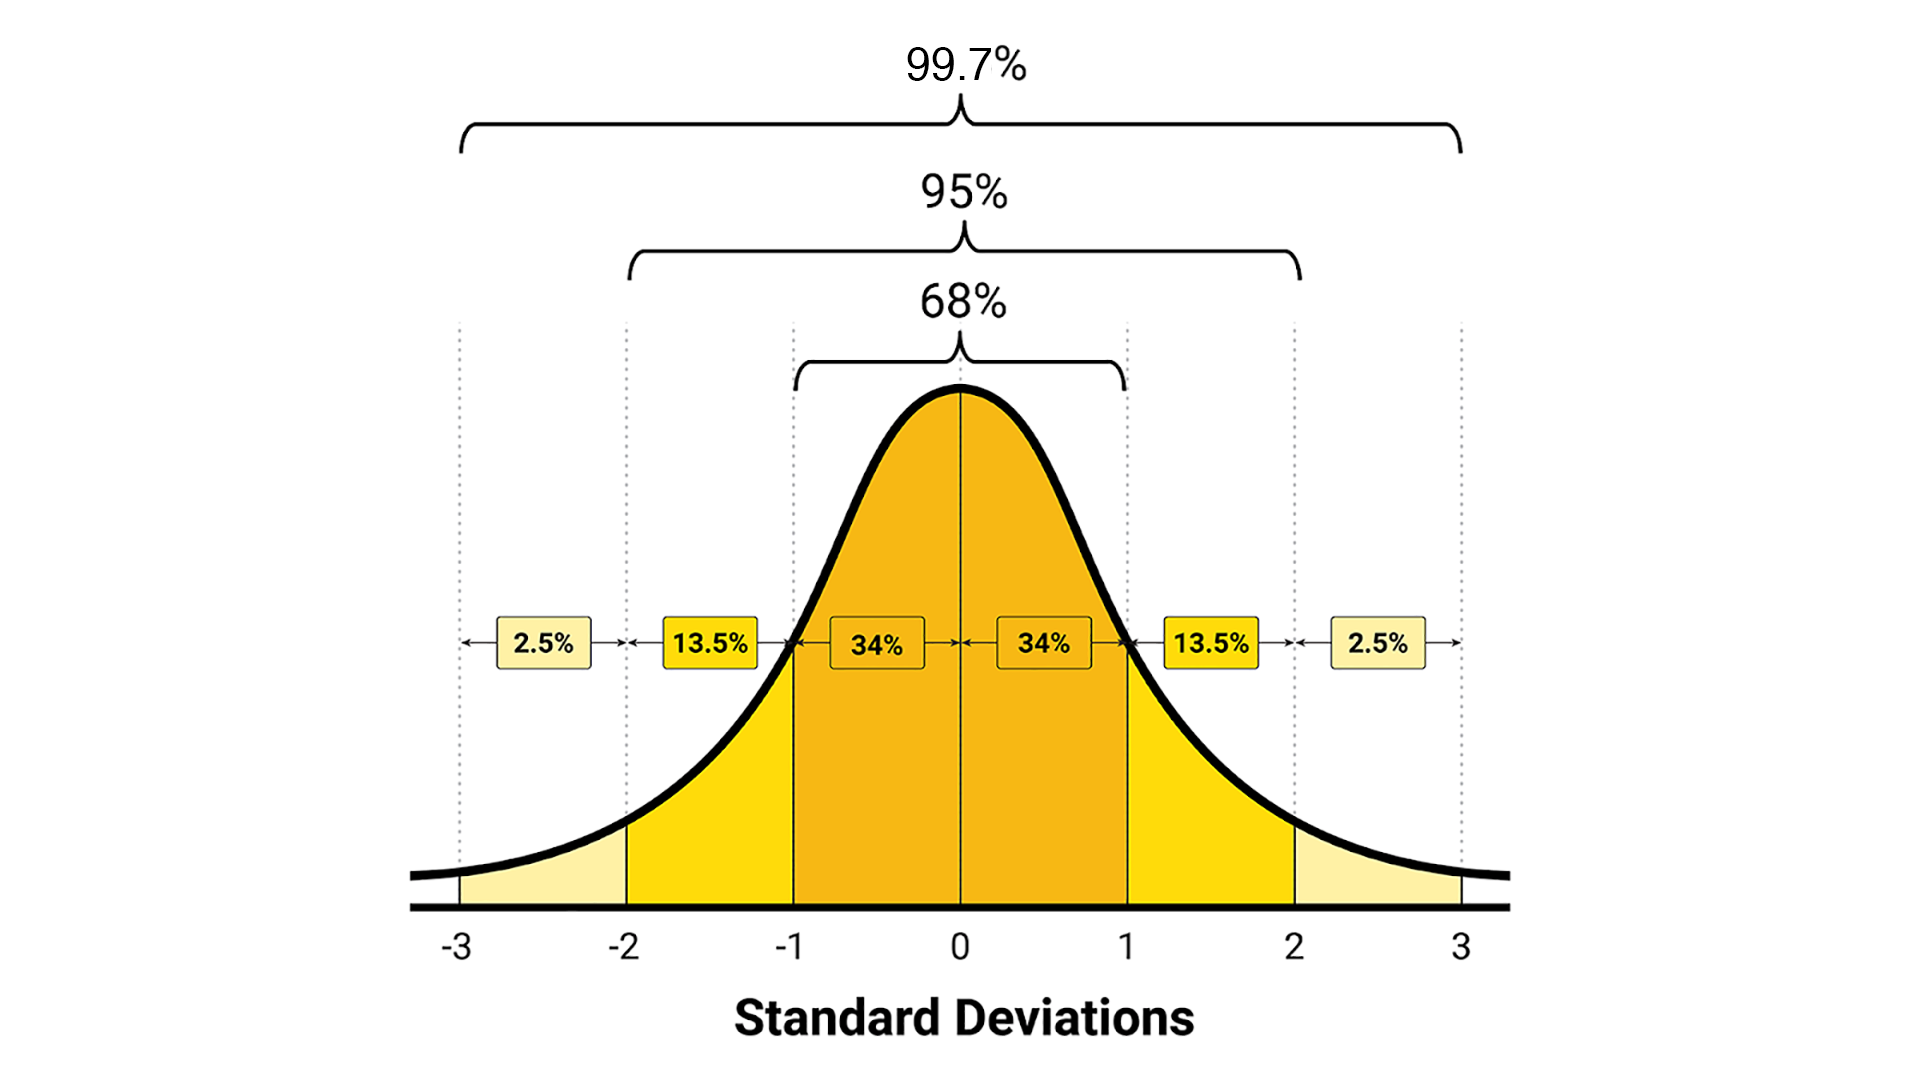

In a normal distribution of numerical data, the probability that a data point equals a particular value follows the 68-95-99.7 rule. This rule states that 68%, 95%, and 99.7% (effectively 100%) of possible values lie within one, two, and three standard deviations, respectively, of the mean.

The standard deviation defines the x-axis of the probability distribution plot. The standard deviation for a dataset defines its probability distribution. We associate a standard deviation of zero with the mean of the dataset. The values of the standard deviations correspond to how the data spreads out around that mean value.

# Important.

The mean of a dataset is a measure of central tendency that describes the center of a dataset. The standard deviation of a dataset measures how the data spreads out around the mean value. While the mean is a measure of central tendency, the standard deviation is a measure of dispersion. In Pandas, you can find both of these values by using the describe function.

Normal distributions prove particularly useful in finance, because they adequately approximate the volatility of the daily return values for stock prices and other financial assets.

For example, the daily return value from a high-volatility stock, such as Tesla, and from a low-volatility stock, such as Coca-Cola, can both demonstrate normal distributions. This happens despite the differences in company size, customer base, stock price, and market share. And guess what? We can calculate and visualize the normal distributions of such stocks by using Pandas.

# Calculate and Visualize Probability Distributions.

Let’s calculate and then visualize the probability distribution for the Tesla and Coca-Cola stock prices. We’ll start by collecting the stock price data and use the Alpaca SDK to make the API call.

# Get the Stock Data.

To get the price data over one year for Tesla (TSLA) and Coca-Cola (KO) stock, we need the ticker symbols, the time frame, and the start and end dates. We need these items to make the API call via the Alpaca SDK `get_barset function`. Additionally, the `get_barset function` returns only 100 rows of data by `default`, so in order to obtain enough data, we'll need to override this by setting the maximum number of rows to 1000.

The following code makes the API call:

In [ ]:
# Set the Tesla and Coca-Cola ticker symbols
tickers = ["TSLA","KO"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

# Get 1 year's worth of historical data for Tesla and Coca-Cola
prices_df = alpaca.get_barset(
  tickers,
  timeframe,
  start=start_date,
  end=end_date,
  limit=limit_rows
).df

# Display sample data
prices_df.head()
prices_df.tail()

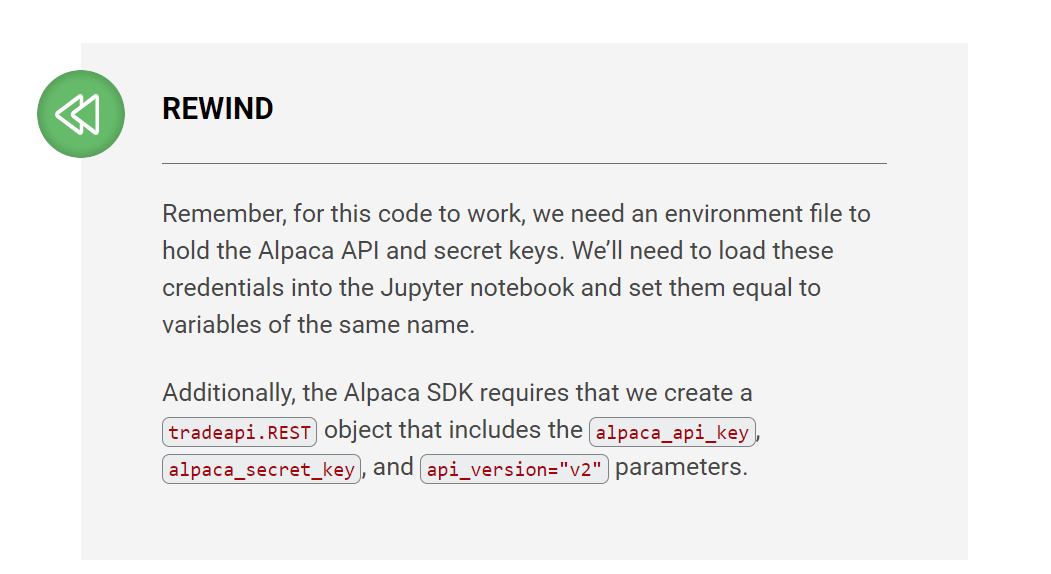

The following image shows the resulting Pandas DataFrame. It contains the values for the open, `high`, `low`, `close`, and `volume` columns for the KO and TSLA stocks starting on May 1, 2019 and ending on May 1, 2020.

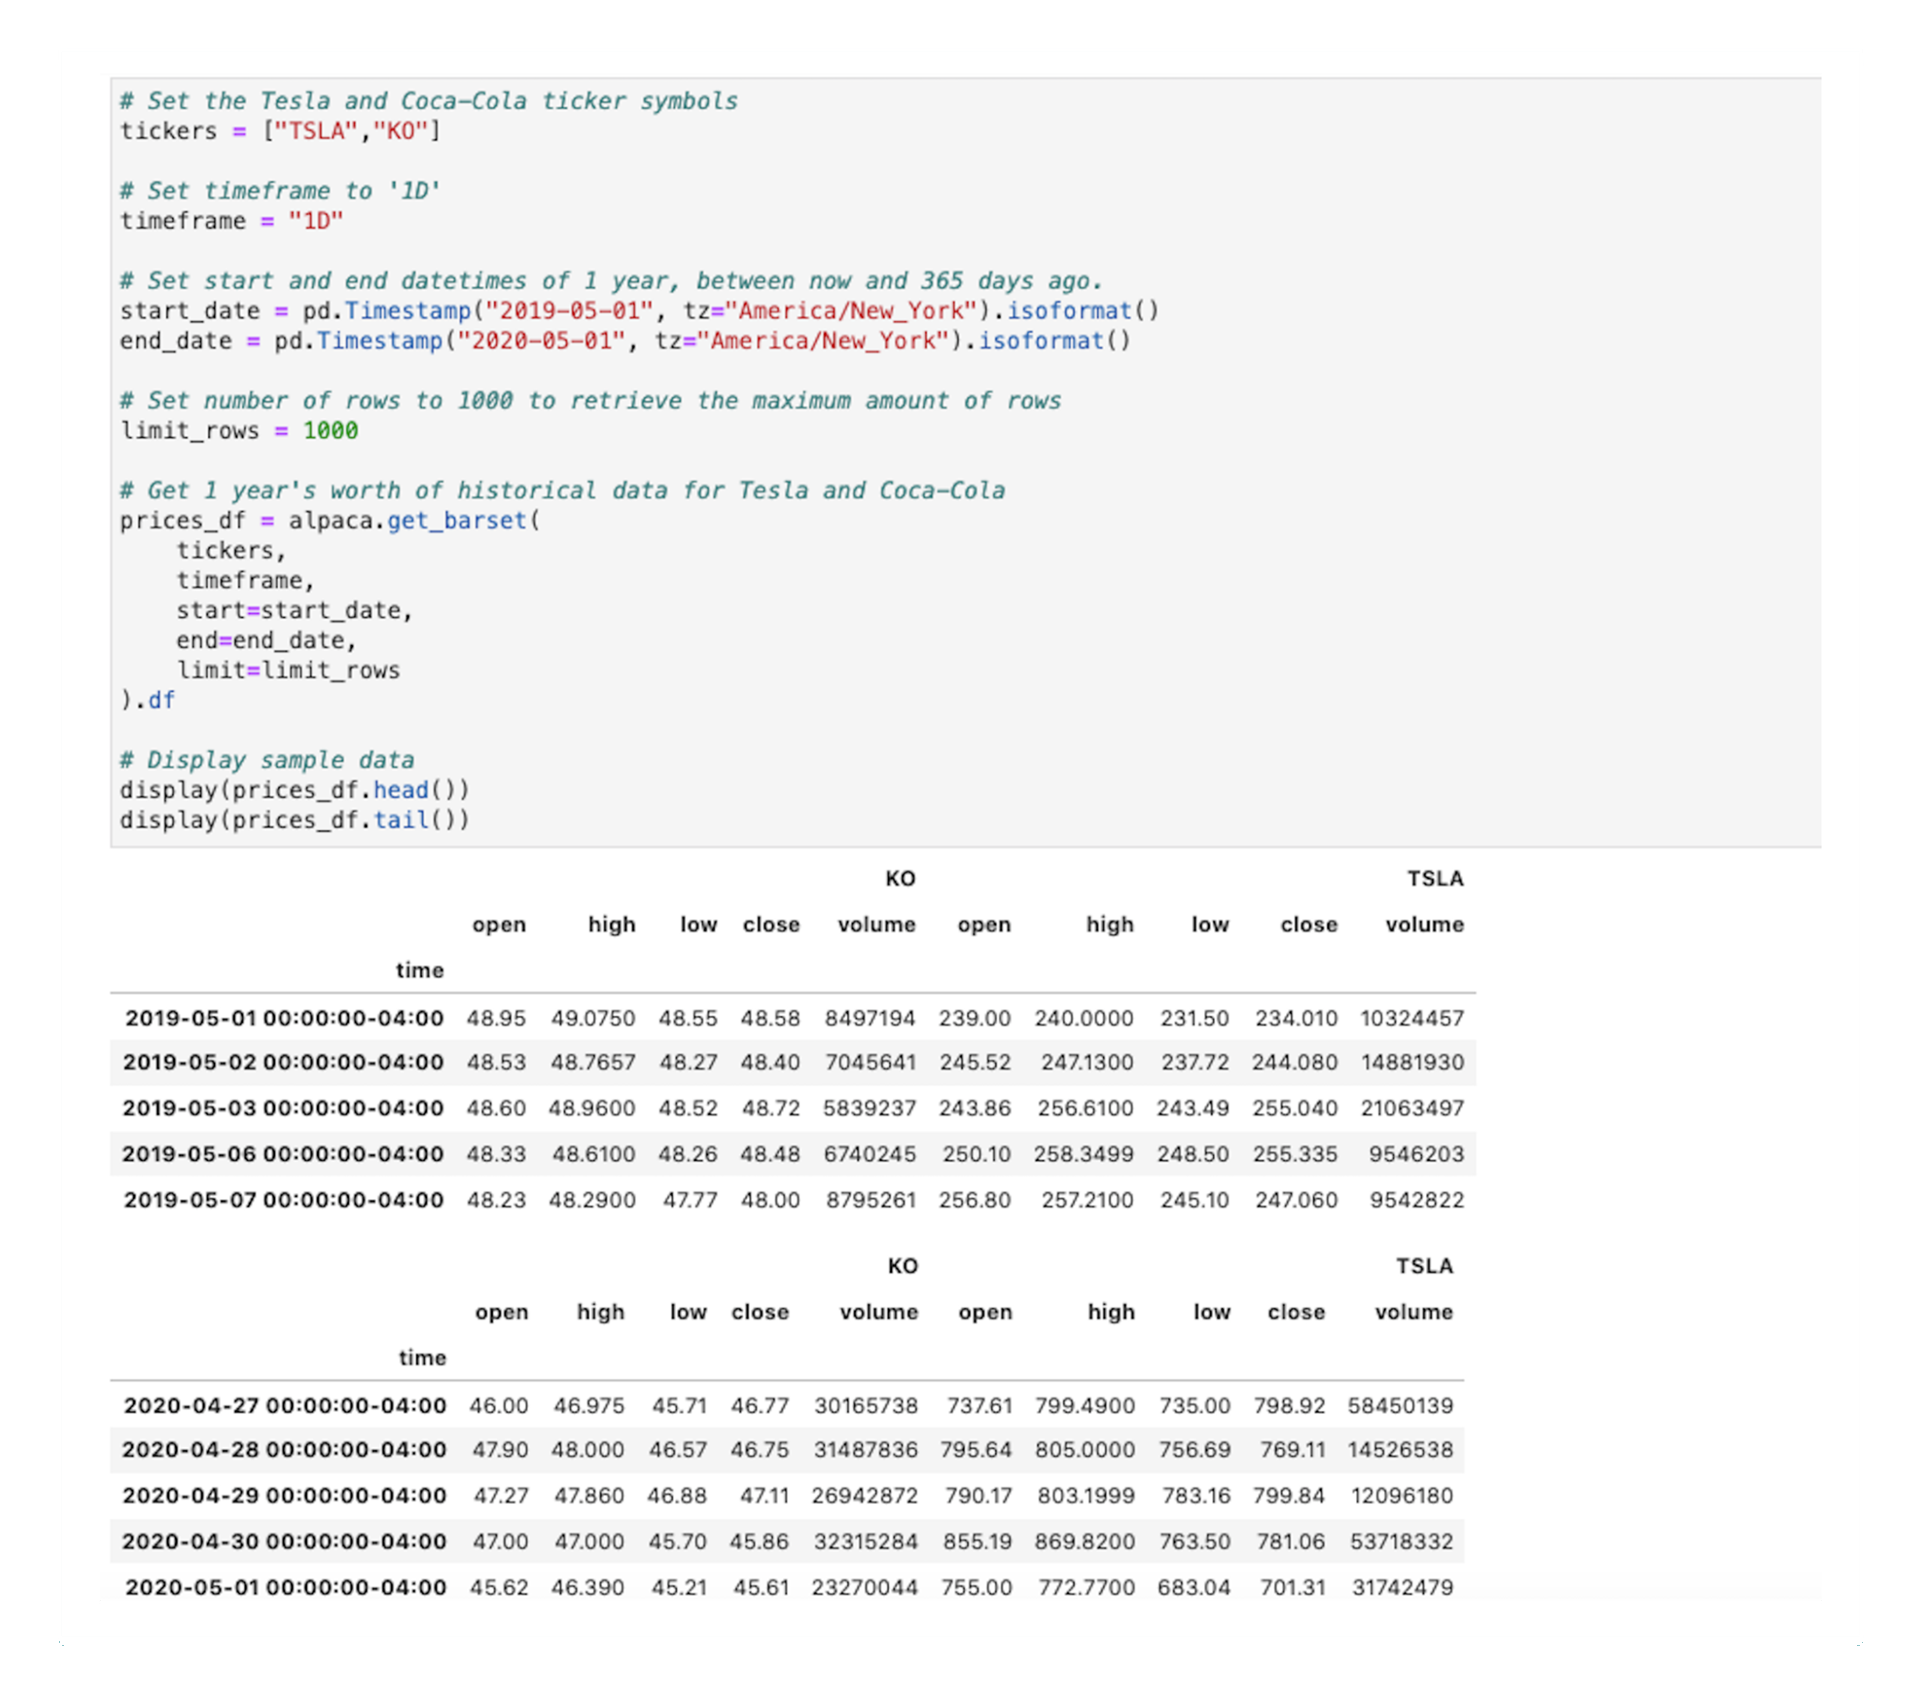

To analyze the probability distribution for these stocks, we need only the closing prices for the period to generate a daily returns DataFrame.

# Analyze the Closing Prices and Daily Returns.

To analyze the probability distribution of these stock prices, we first need to create a DataFrame that contains only the closing prices for the period. Then, we can generate our daily returns DataFrame.

We start by creating the `closing_prices_df`DataFrame, which contains the close column from the prices_df DataFrame for both KO and TSLA.

Next, the index for the `closing_prices_df` DataFrame needs to keep only the date information from the original time index, because we’ll analyze the information at the level of one day.

## DAILY RETURNS !!

Finally, we’ll calculate the daily_returns_df DataFrame by calling the pct_change and drop_na functions on the closing_prices_df DataFrame. We’ll also review the head and the tail of the new `daily_returns_df` DataFrame.

In [ ]:
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()

# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both KO and TSLA .
closing_prices_df["KO"] = prices_df["KO"]["close"]
closing_prices_df["TSLA"] = prices_df["TSLA"]["close"]

# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
closing_prices_df.index = closing_prices_df.index.date

# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns_df = closing_prices_df.pct_change().dropna()

# Display both the head and tail of the `daily_returns_df` DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

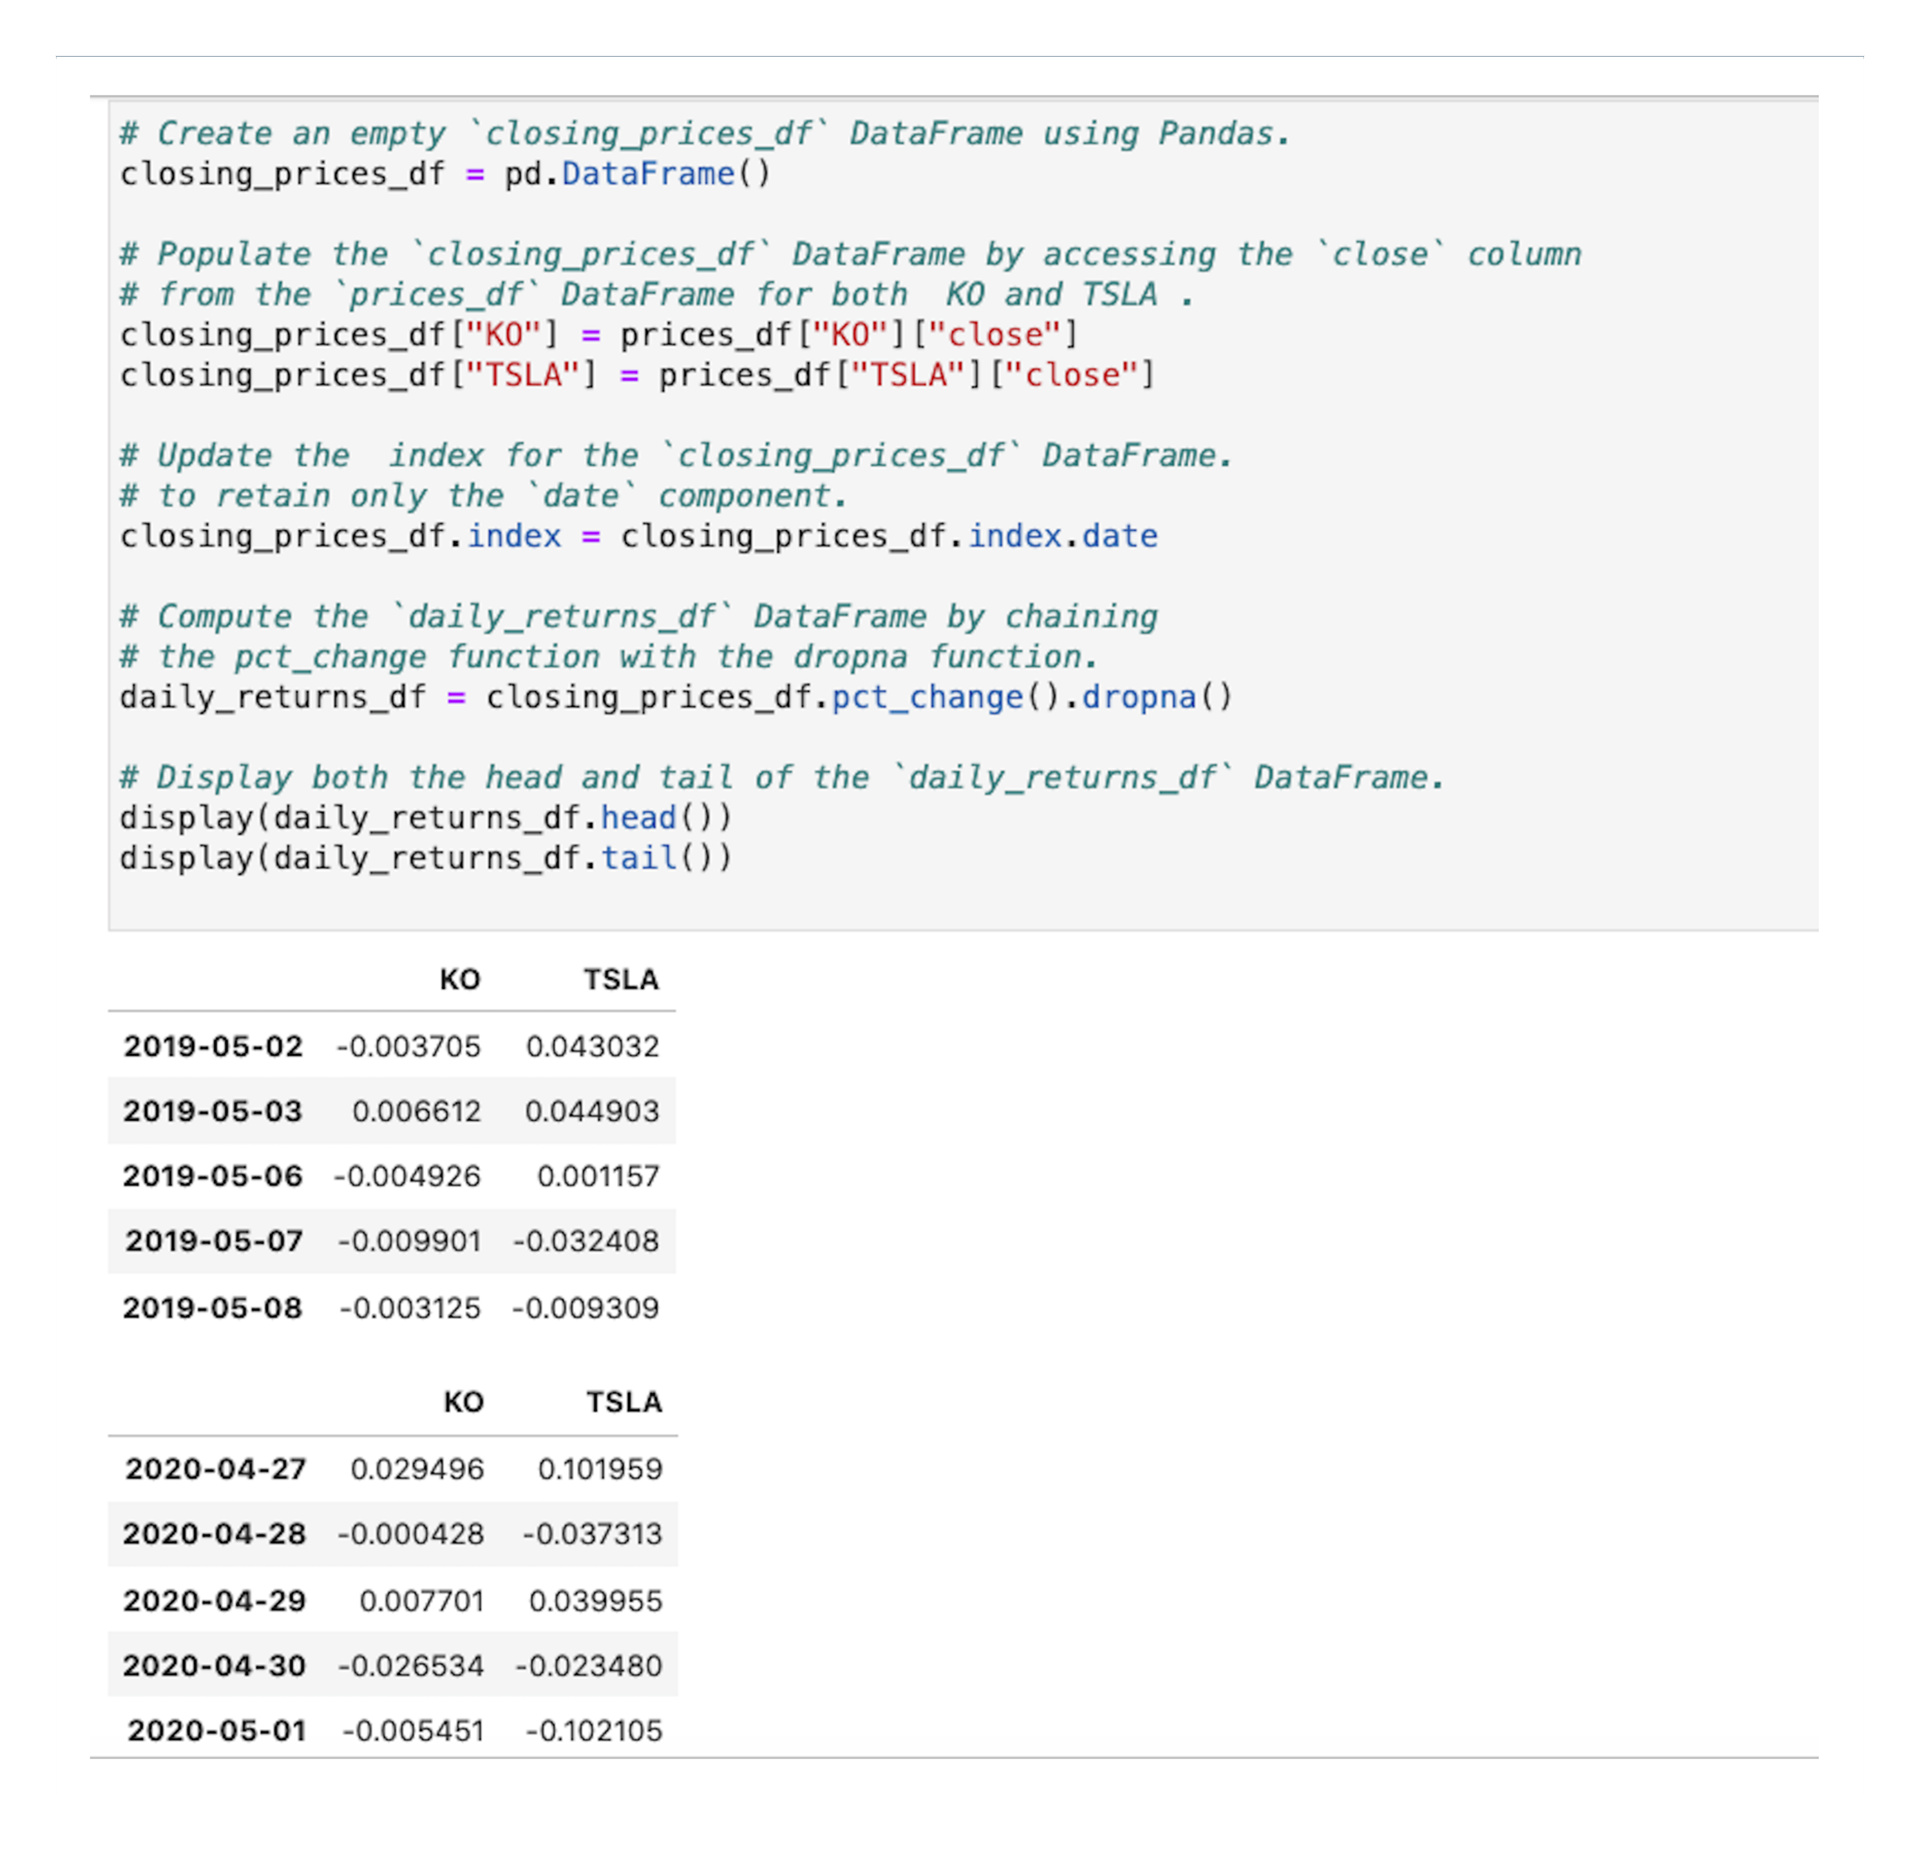

Next, to get an overview of the distribution of these values, we’ll generate summary statistics for this DataFrame by using the `describe` function, as the following code shows:

In [ ]:
# Generate summary statistics for the `daily_returns_df` DataFrame
daily_returns_df.describe()

The following image shows the resulting summary statistics:

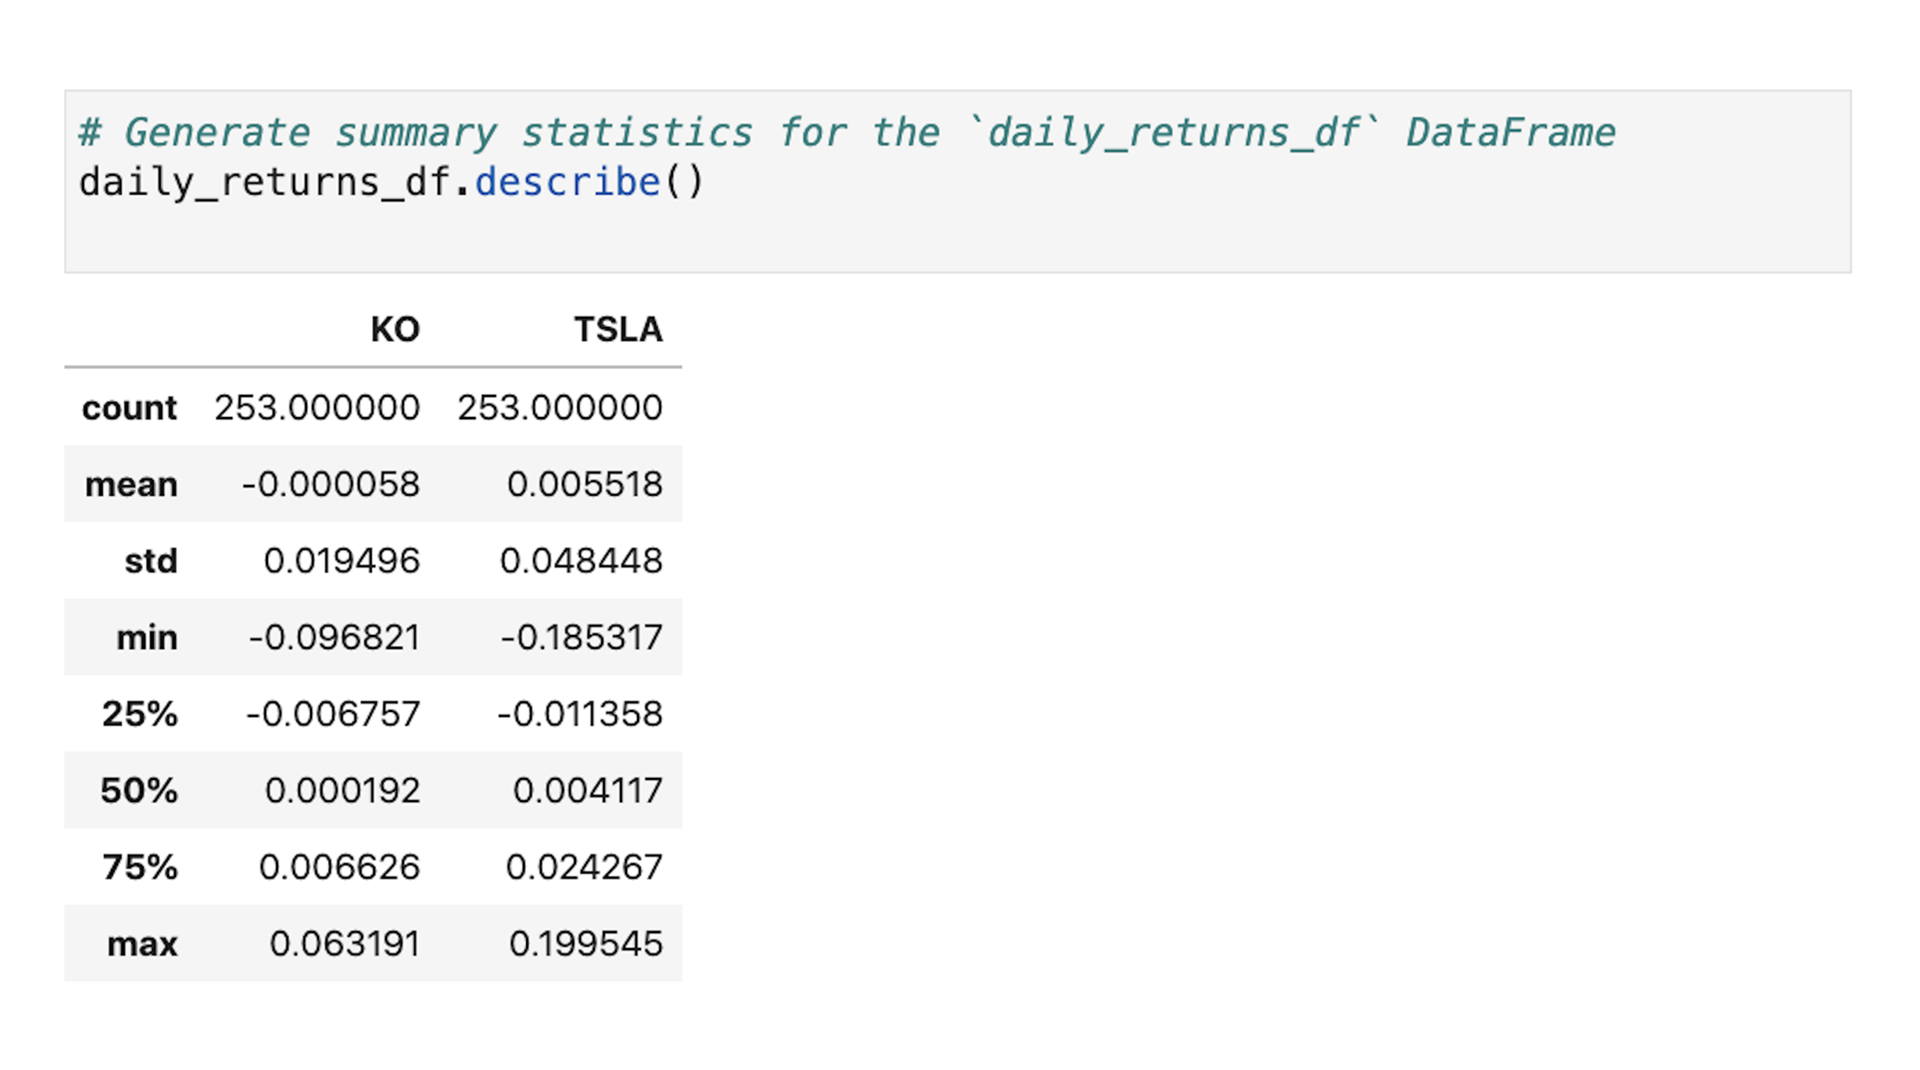

The value we’ll focus on in the summary statistics is the standard deviation (std), which tells us how far from the mean the values distribute.

#### Remember.
A large standard deviation indicates that values lie further away from the mean. This means that the stock prices tend to be more volatile. A smaller standard deviation indicates that values lie closer to the mean. Therefore, the stock prices are less volatile.

However, the standard deviation in the summary statistics doesn’t paint a complete picture of the spread, or distribution, of the daily returns data. By generating a probability distribution, we can visualize the distribution of all the daily-return data points around the mean of the dataset. This is because the probability distribution depends on the standard deviation.

# Plot the Probability Distribution

We visualize a probability distribution by plotting a Pandas `histogram`.

A histogram is a visualization that displays how often the different values appear in a DataFrame. Pandas dynamically groups the values into bins, which are the equal-sized intervals that the histogram defines along the x-axis. The histogram displays the number of elements in each bin along the y-axis. To learn more about the Pandas histogram plot, refer to the Pandas plot.hist page (Links to an external site.).

For a probability distribution, the histogram defines the x-axis values by the range of standard deviations that we generate from the daily return data. The y-axis displays the number of `daily-returns` data points that fall inside that range.

We visualize the histogram for TSLA by calling the Pandas plot.hist function on the `daily_returns_df` DataFrame and specifying TSLA. We plot the KO histogram in the same way, as the following code shows:

In [ ]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
daily_returns_df["TSLA"].plot.hist(title='TSLA Probability Distribution')

# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
daily_returns_df["KO"].plot.hist(title='KO Probability Distribution')


The following image shows the resulting plots:

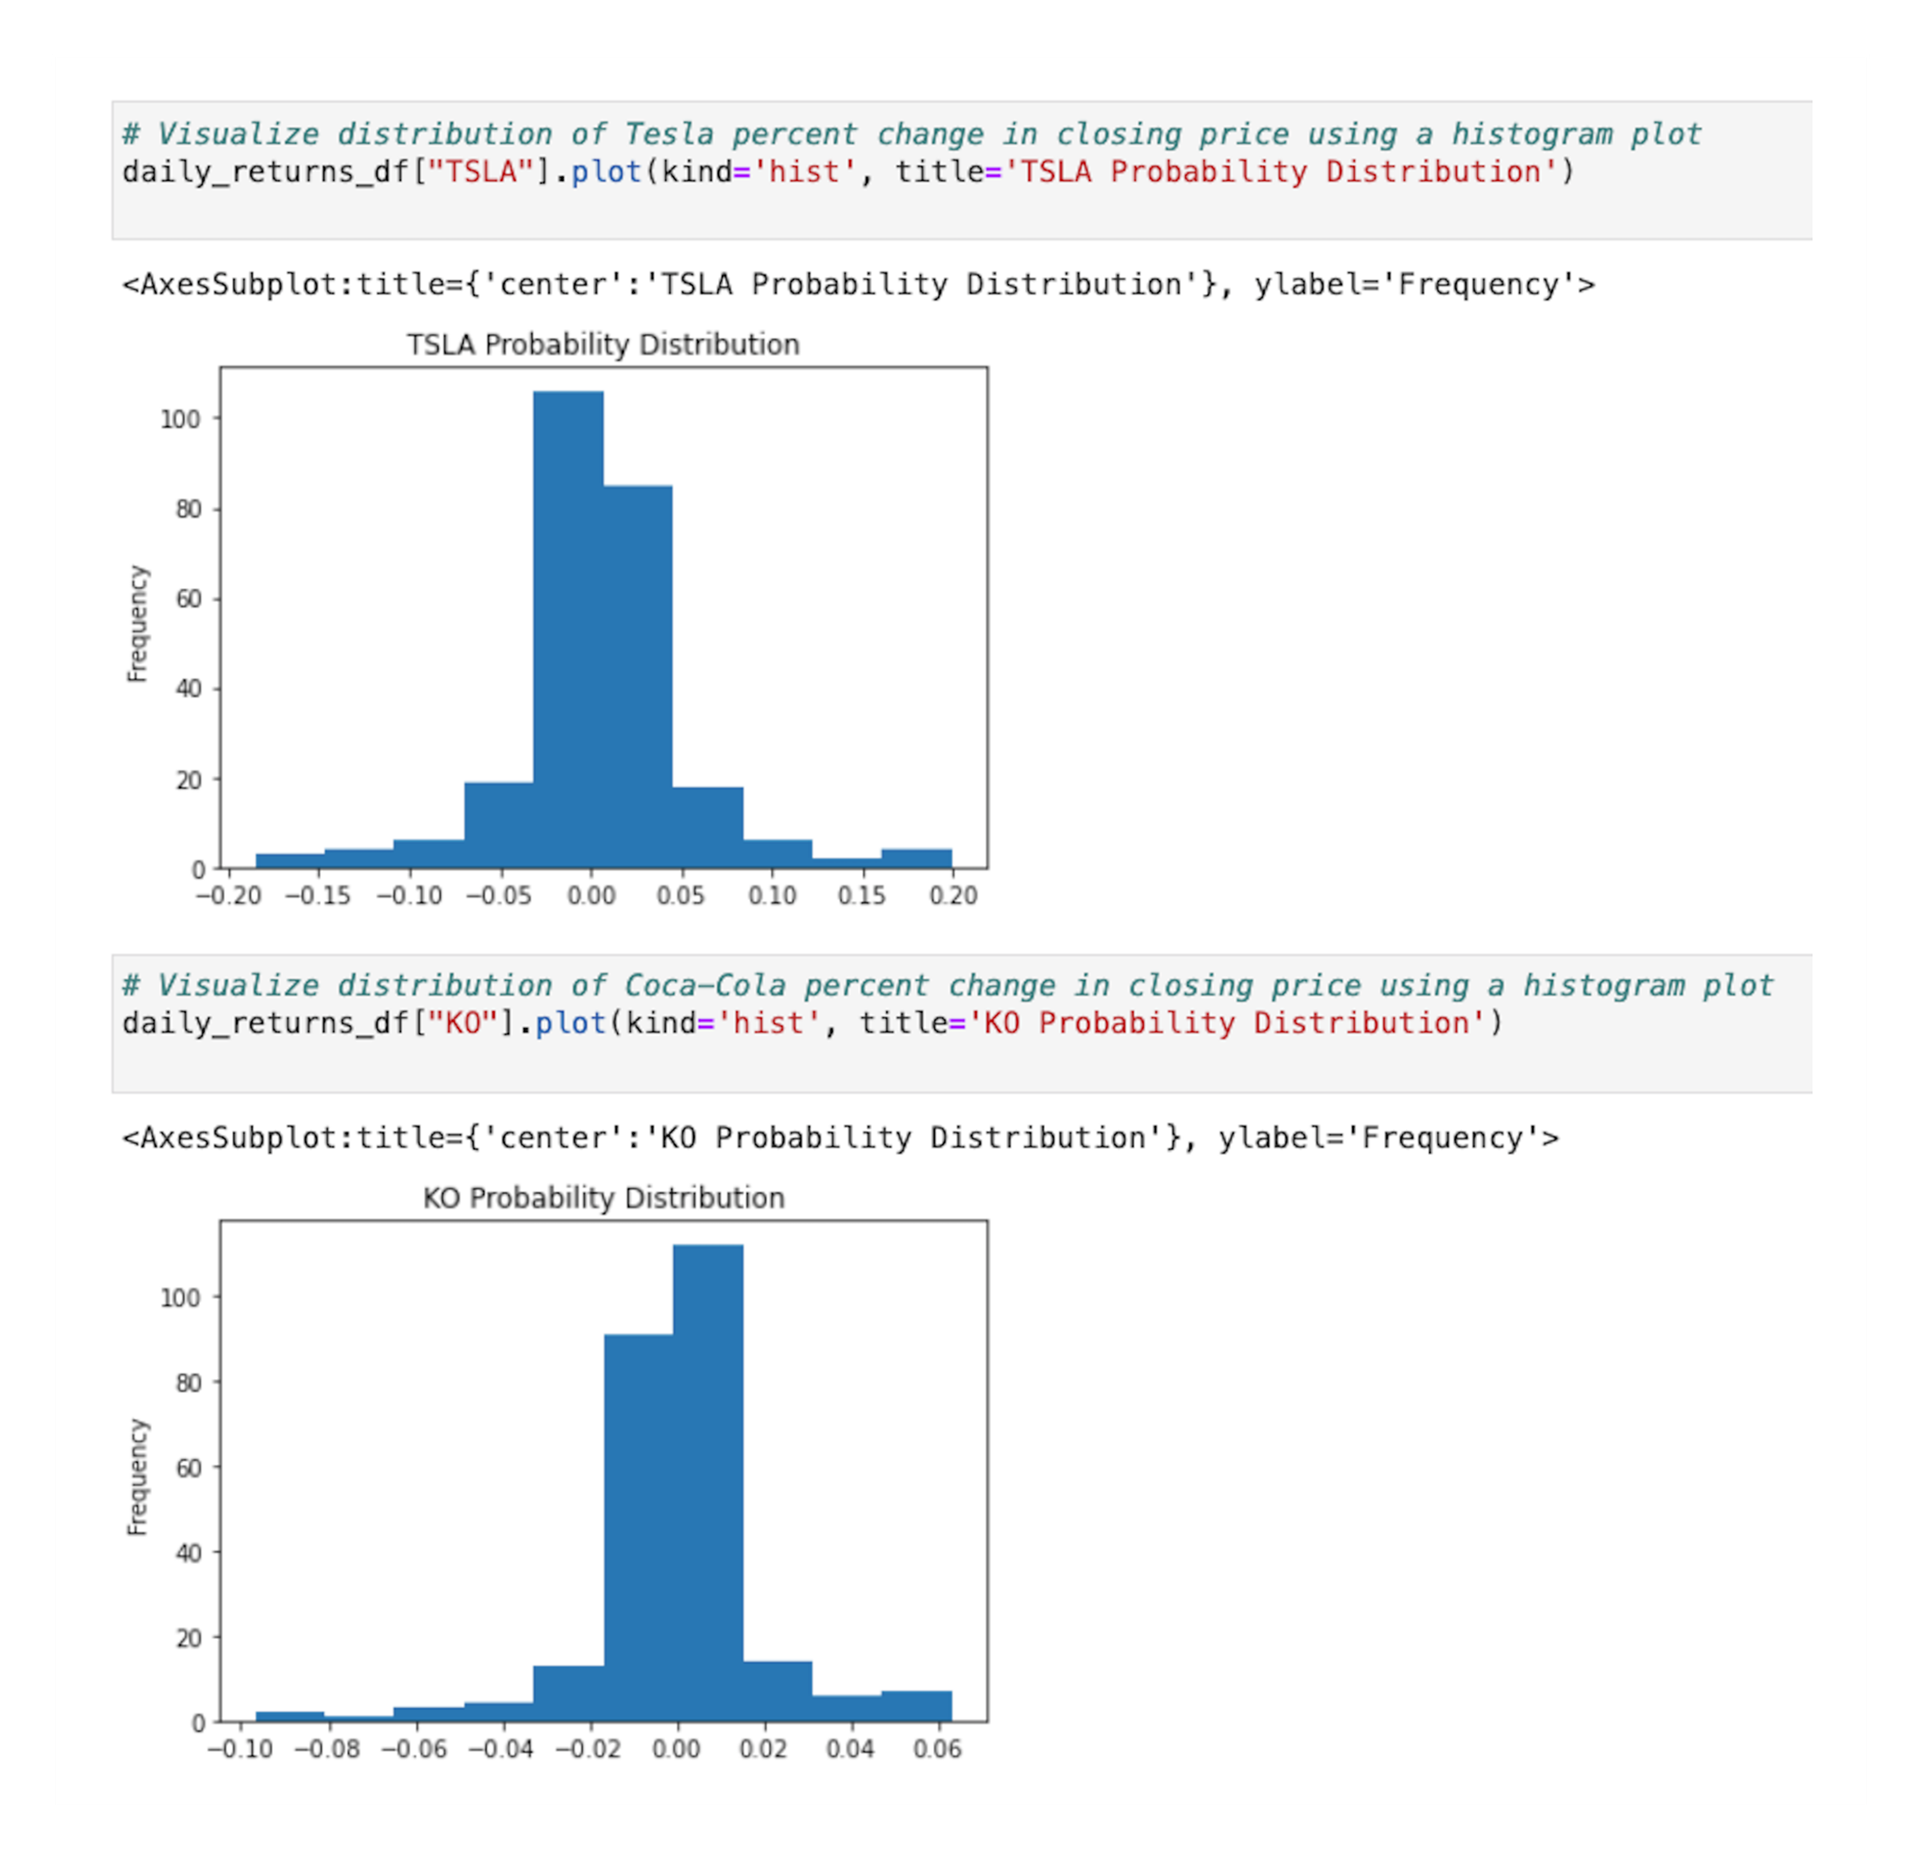

Both plots resemble the bell-curve shape of a normal distribution. This indicates that more daily-return data points lie close to the mean than further away.

Notice also that most daily-return data points for KO lie within a standard deviation of +/− .02, while most TSLA data points lie within a standard deviation of +/− .05. These values indicate that the daily return values for TSLA spread out further around the mean than those for KO. TSLA is thus the more volatile stock of the two.

# Use a Density Plot.
Besides using a histogram, we can use a Pandas density plot to visualize the probability distribution of the KO and TSLA daily return values. Just like the Pandas’ `rolling` function smoothes out the volatility of daily changes in a stock’s standard deviation, a density plot smoothes out the bins from a probability distribution histogram.

The following code creates a density plot for both `KO` and `TSLA` by calling the `plot.density` function on the `daily_returns_df` DataFrame. This makes it easier to compare the distributions of the daily-return data points of the two stocks:

In [ ]:
# Visualize the distribution of daily returns data for both KO and TSLA
# by calling the plot.density function on the daily_returns_df DataFrame.
daily_returns_df.plot.density(title='Density Plot for KO & TSLA')

The following image shows the resulting density plot:
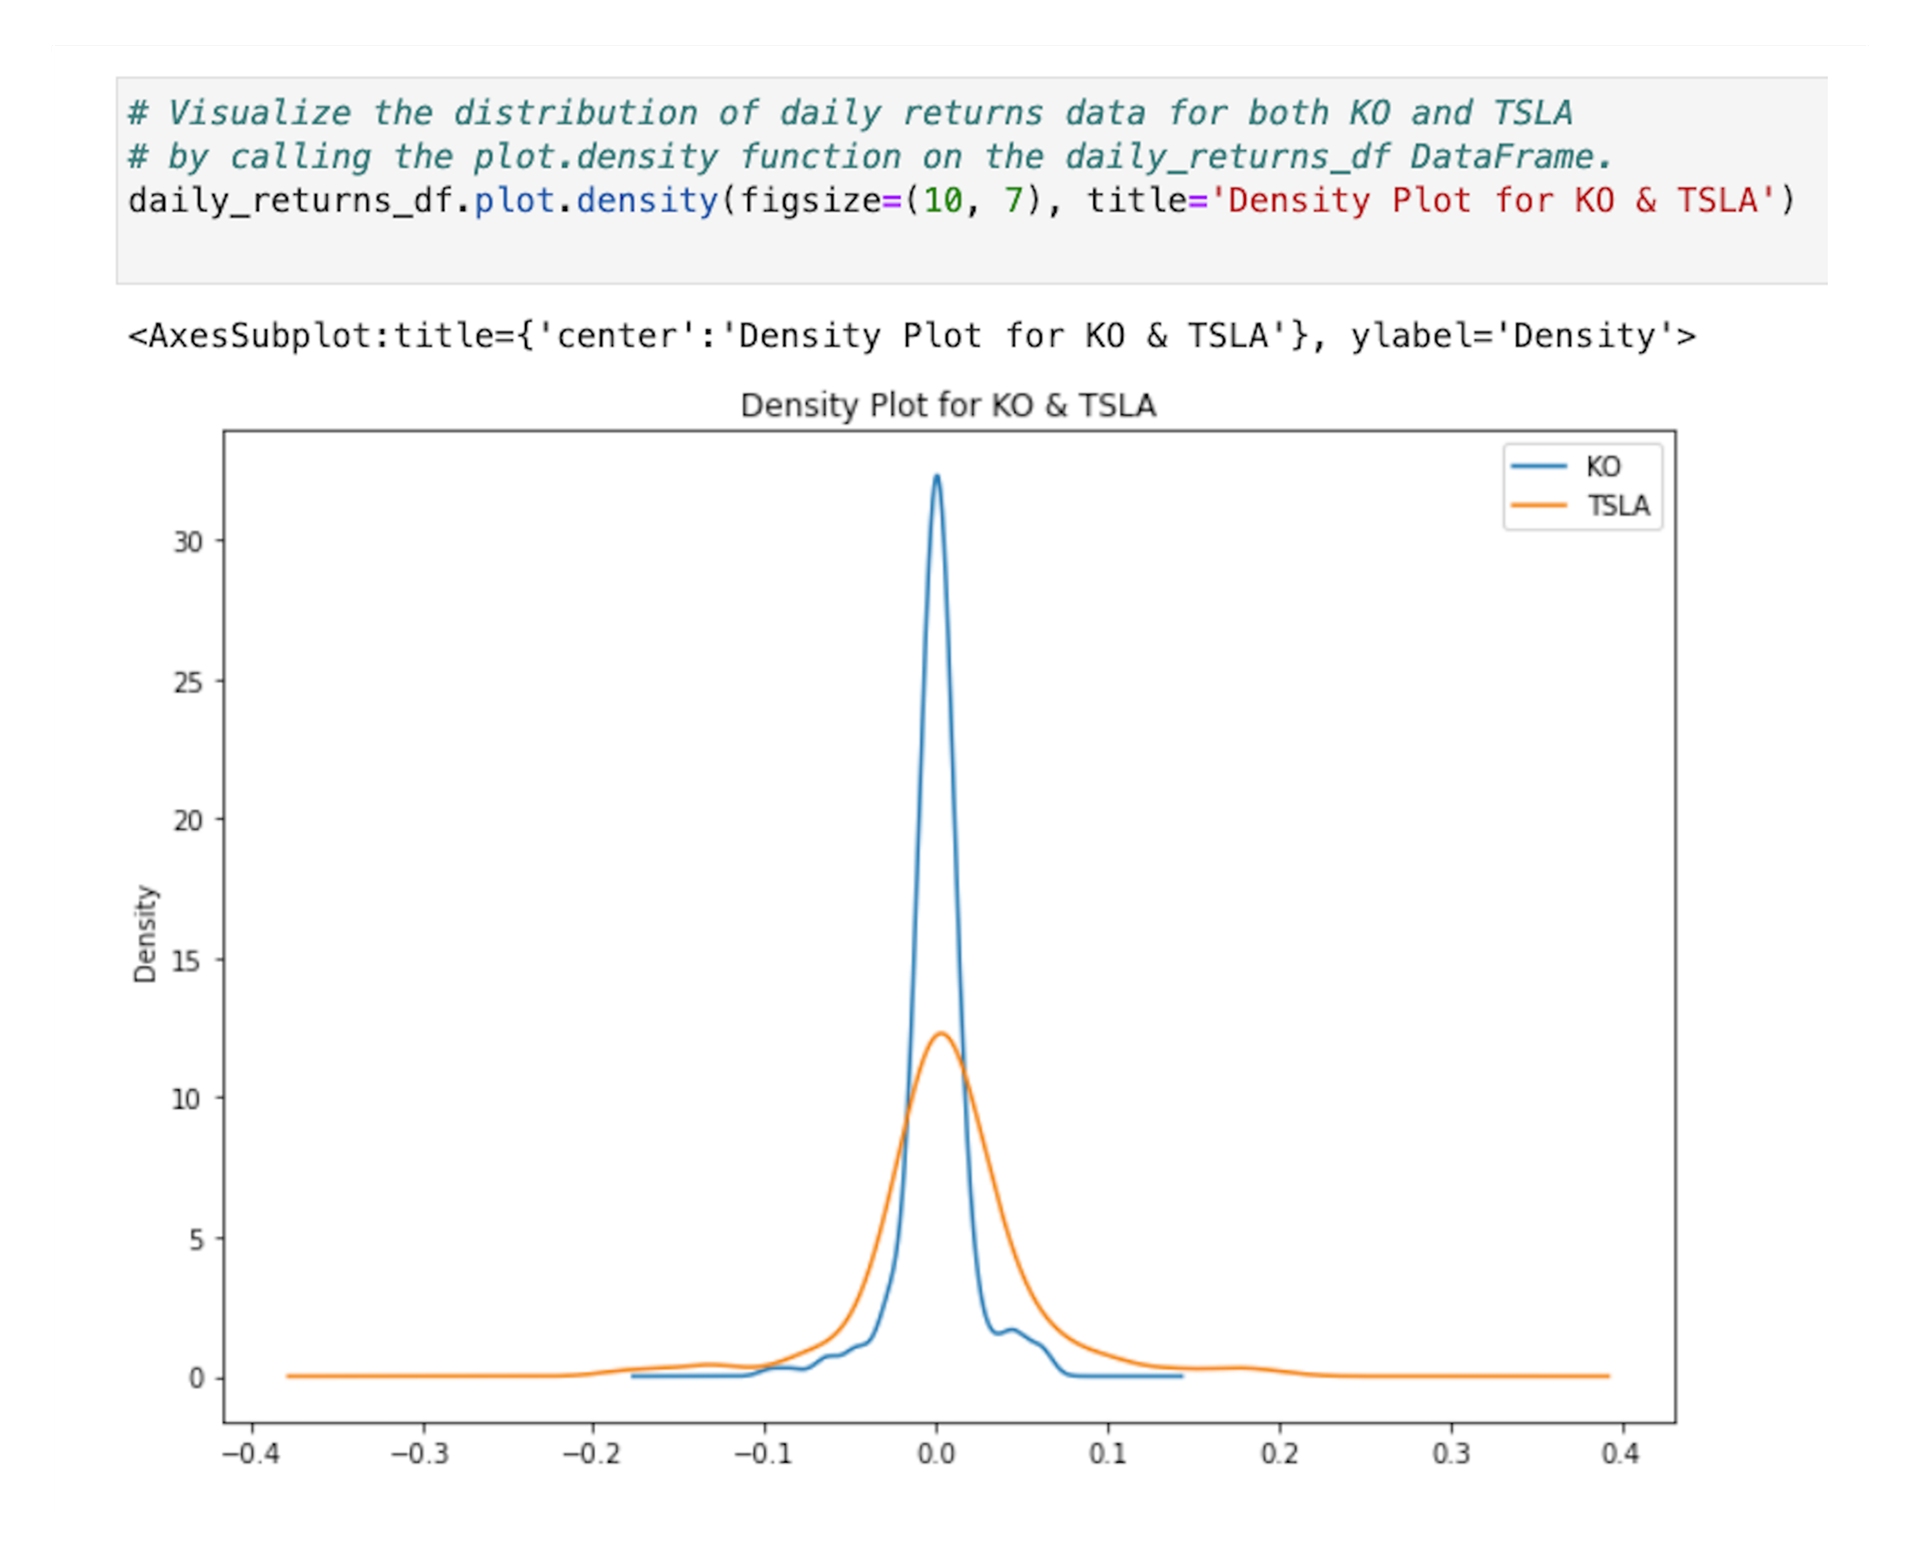

The overlay of the two distributions shows that the KO distribution has a greater frequency of small daily changes compared to TSLA. The blue line for KO illustrates this. First, note that the y-axis indicates the number of occurrences. The blue line for KO reaches much higher along the y-axis. This line is also much narrower at the base, which measures the standard deviation, or the spread around the mean value. The volatility of the stock causes this. (Remember that the less volatile the stock, the smaller the standard deviation.) That is, a smaller standard deviation means that the stock is less likely to have large changes in value, whether positive or negative.

Most pricing distributions aren’t perfectly normal. However, as a fintech professional, it’s important that you understand the normal distribution. In general, it’s assumed that price changes, or daily return values, for stocks and other assets have a normal distribution. This is especially true as the time period for the analysis increases.

Now that you’ve learned how to calculate and analyze probability distributions by using the Alpaca SDK and Pandas functions, it’s your turn to generate some probability distributions.


# Lesson 24

### Activitiy1 

https://courses.bootcampspot.com/courses/800/pages/5-dot-2-4-activity-decisive-probability-distributions?module_item_id=235178


# Predict Performance via the Standard Deviation.
Let’s do a quick recap. Recall the normal distribution illustration from earlier in the lesson, as the following image shows:

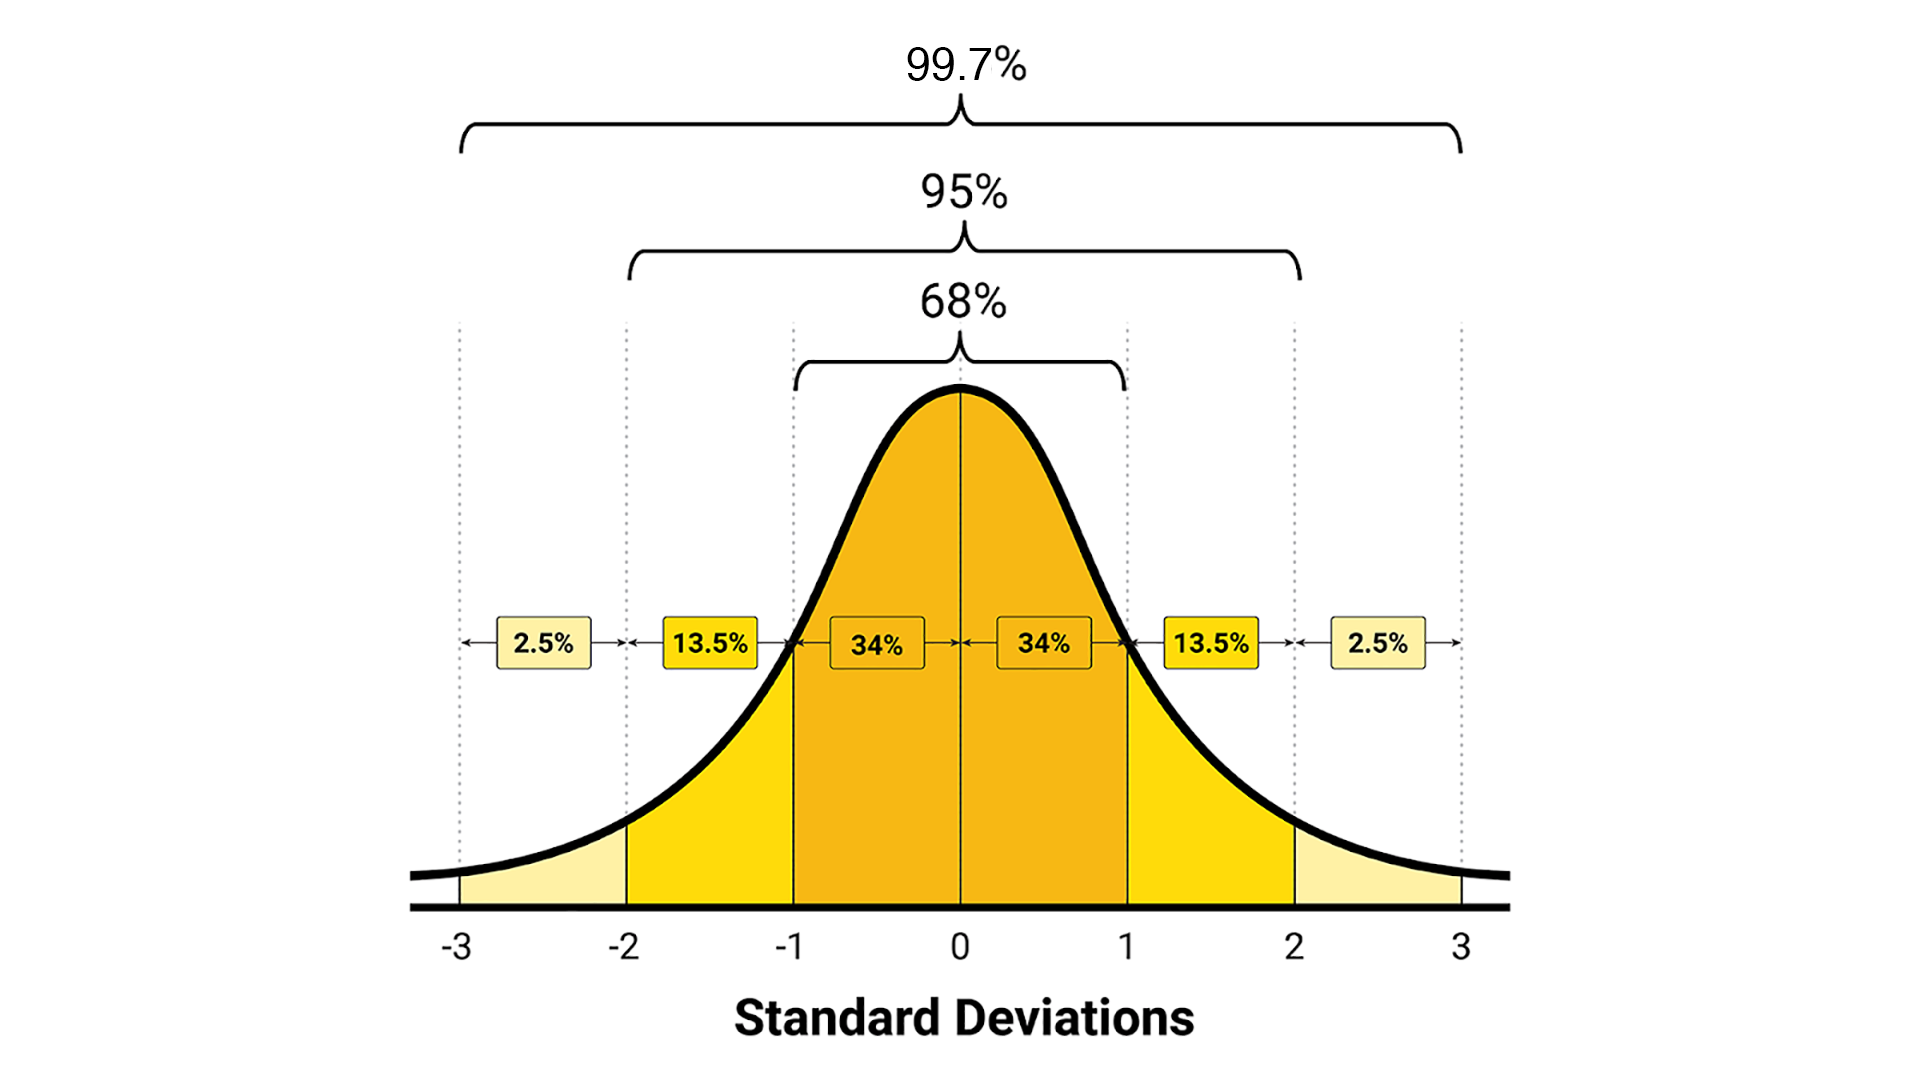


As the image shows, a normal distribution means the following:

- A 68% probability exists that an event will end up between −1 and +1 standard deviations of the mean.

- A 95% probability exists that an event will end up between −2 and +2 standard deviations of the mean.

- A 99.7% probability exists that an event will end up between −3 and +3 standard deviations of the mean.

We also know that the Pandas `describe` function generates both the mean and the standard deviation values for a specified Series of data.

With this information, we should be able to state that based on the historical performance of a stock, a 68% probability exists that the daily return value of a stock will fall around the mean value—specifically, within plus or minus one standard deviation of the mean.

For example, the following code and resulting image shows the summary statistics and the histogram that are based on the return data from May 1, 2019 through May 1, 2020 for the Zoom Video Communications (ZM) stock.

The following code generates the summary statistics and the histogram:

In [ ]:
# Generate descriptive statistics
daily_returns_df.describe()

# Visualize distribution of Zoom percent change in closing price using a histogram plot
daily_returns_df["ZM"].plot(kind='hist', title='Zoom Probability Distribution')

And here is the resulting image:

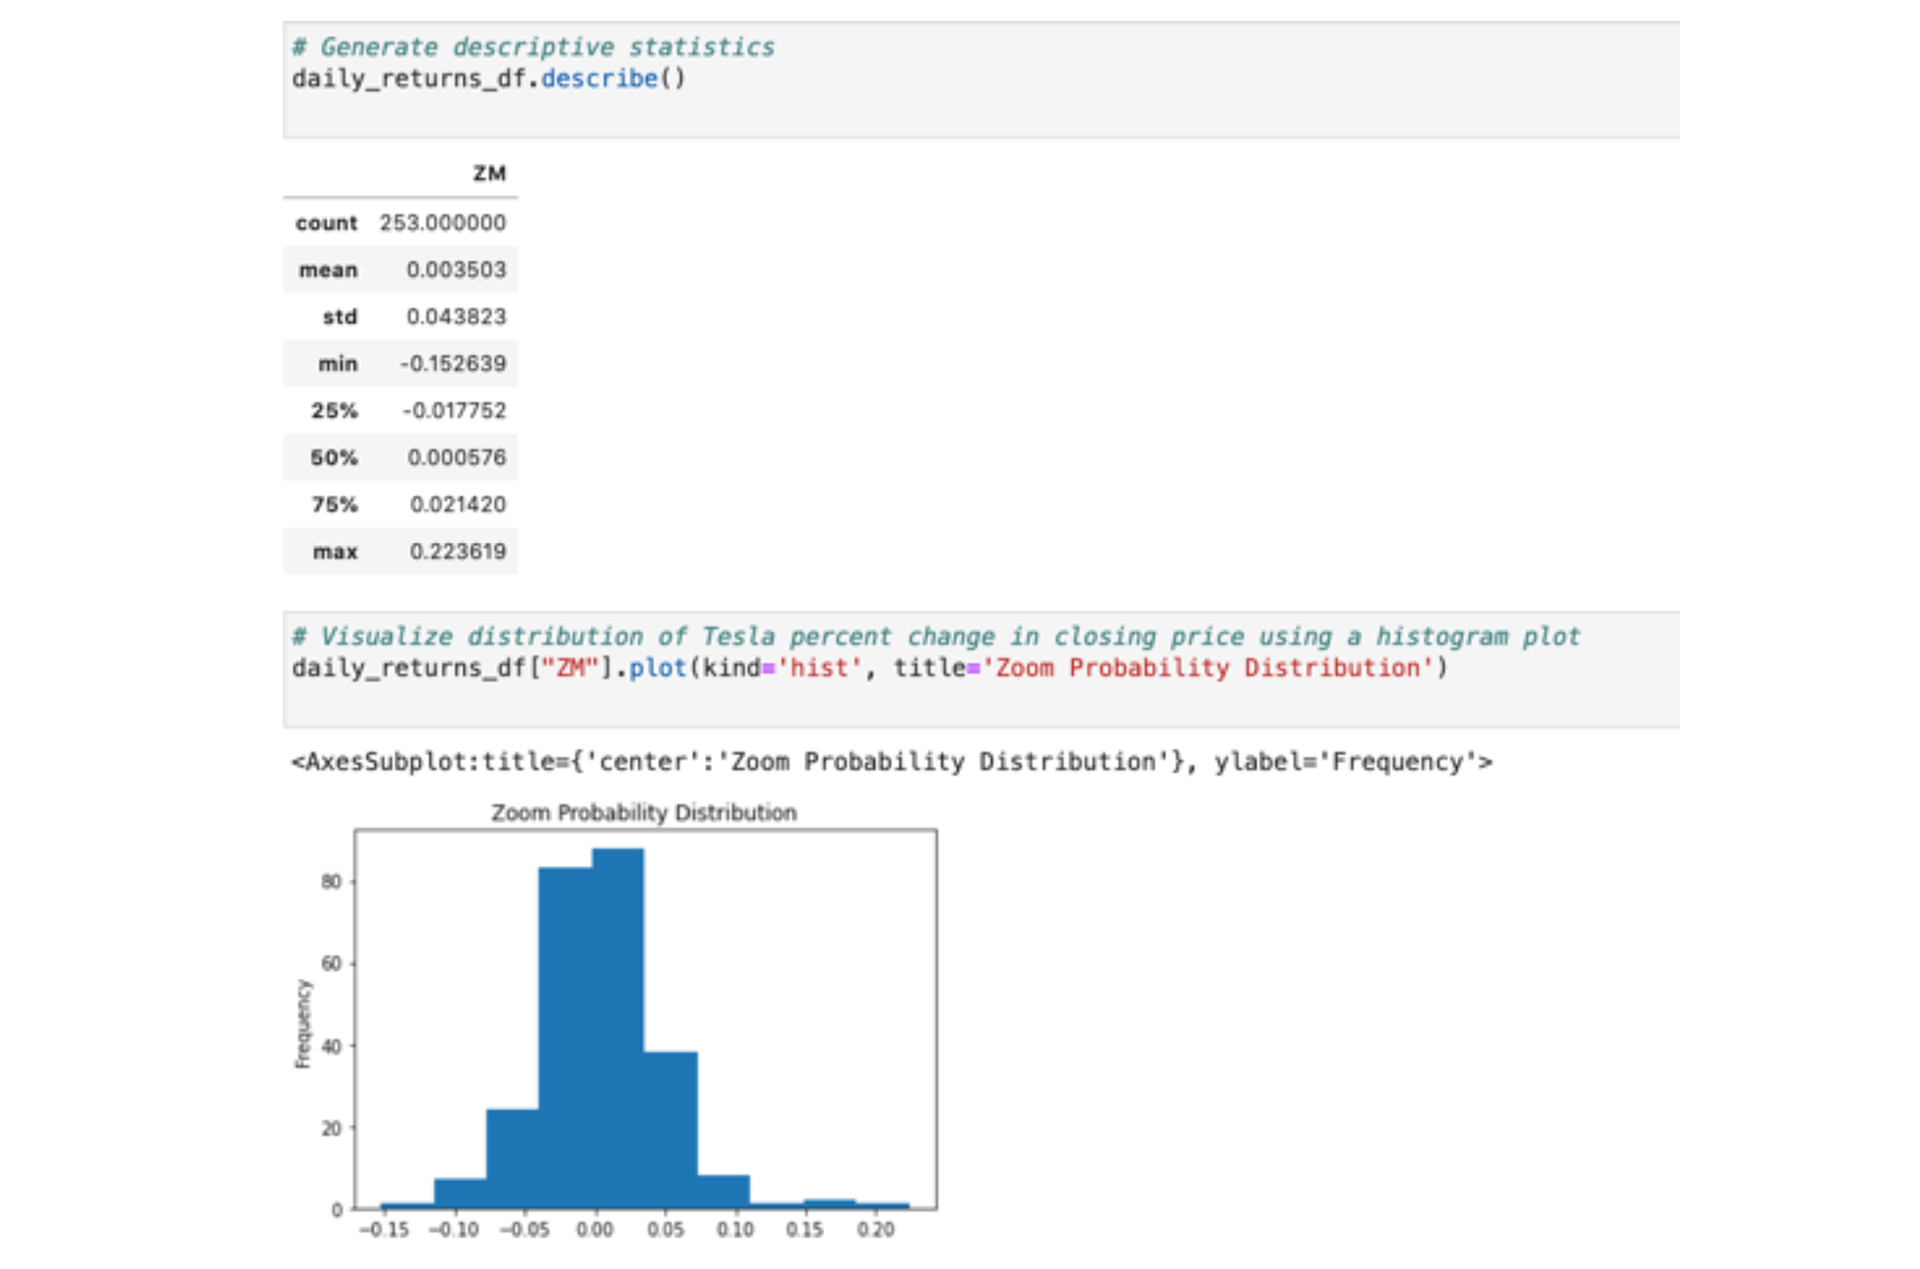

Based on the summary statistics, we can state that a 68% probability exists that the daily return value of Zoom Video Communications will likely be the mean (0.003503) plus or minus one standard deviation (0.043823). That gives us a range of −4.032% (or −0.04032) to +4.7326% (or 0.047326).

Although it’s possible to quantify expected outcomes in terms of probabilities, it’s more common to express them in terms of confidence intervals.

# Use Confidence Intervals.

A confidence interval defines a range of values that will likely occur with a certain degree of confidence. The values contain the best estimate of a statistical measurement—for example, a daily return value. We express the confidence interval as a percentage. People most commonly use 95% for the confidence interval.

For example, we want to calculate the range of possible daily return values that allows us to make the following statement:

From the analysis of our historical data, with a 95% confidence interval, we can expect our daily return value to be between a lower-bound value and an upper-bound value.

In a normal distribution, 95% of all the values fall within 1.96 standard deviations (std) of the mean value. This translates to the following (where std is the standard deviation):

95% confidence lower-bound return = mean − (1.96 × std)

95% confidence upper-bound return = mean + (1.96 × std)

# Z- Score
We calculate the confidence intervals by using a z-score (Links to an external site.). The z-score connects the confidence interval and the standard deviation. The z-score for the 95% confidence interval is 1.96, or 1.96 standard deviations from the mean. The z-score for the 99% confidence interval is 2.576, or 2.576 standard deviations from the mean. The z-score for the mean of a dataset is zero. With the z-score, we can compare the results of an analysis to a normal distribution. The higher the z-score, the further away the value is from the mean.

https://youtu.be/16vAjsnazEM


------------------------------------------------


Using the values from the Zoom Video Communications summary statistics (the mean is 0.003503, and the standard deviation is 0.043823), we can state the following:

From the analysis of the Zoom Video Communications historical return data, with a 95% confidence interval, we can expect our daily return value to fall between −8.239% and +8.808%.

We can use the confidence interval values to calculate the prices that we expect to occur. For example, the price of Zoom Video Communications stock on the last day in the dataset is $138.61. Therefore, we can estimate the following with a 95% confidence interval:

The lower bound of the expected price for the next day is $127.19. We get that from the following equation:

138.61 × (1 − 0.08239).
The upper bound is $150.82. We get that from the following equation:

138.61 × (1 + 0.08808).

You’re getting better and better at quantifying uncertainty. So far, you’ve used data to measure the probability of events that will likely occur with a high degree of confidence. But what about quantifying the probability of events that will not likely occur? This is known as the tail risk.

# Quantify the Tail Risk.

Tail risk occurrences are the possible outcomes that the tail ends of the normal distribution define. The following image points out the tail ends in a normal distribution:

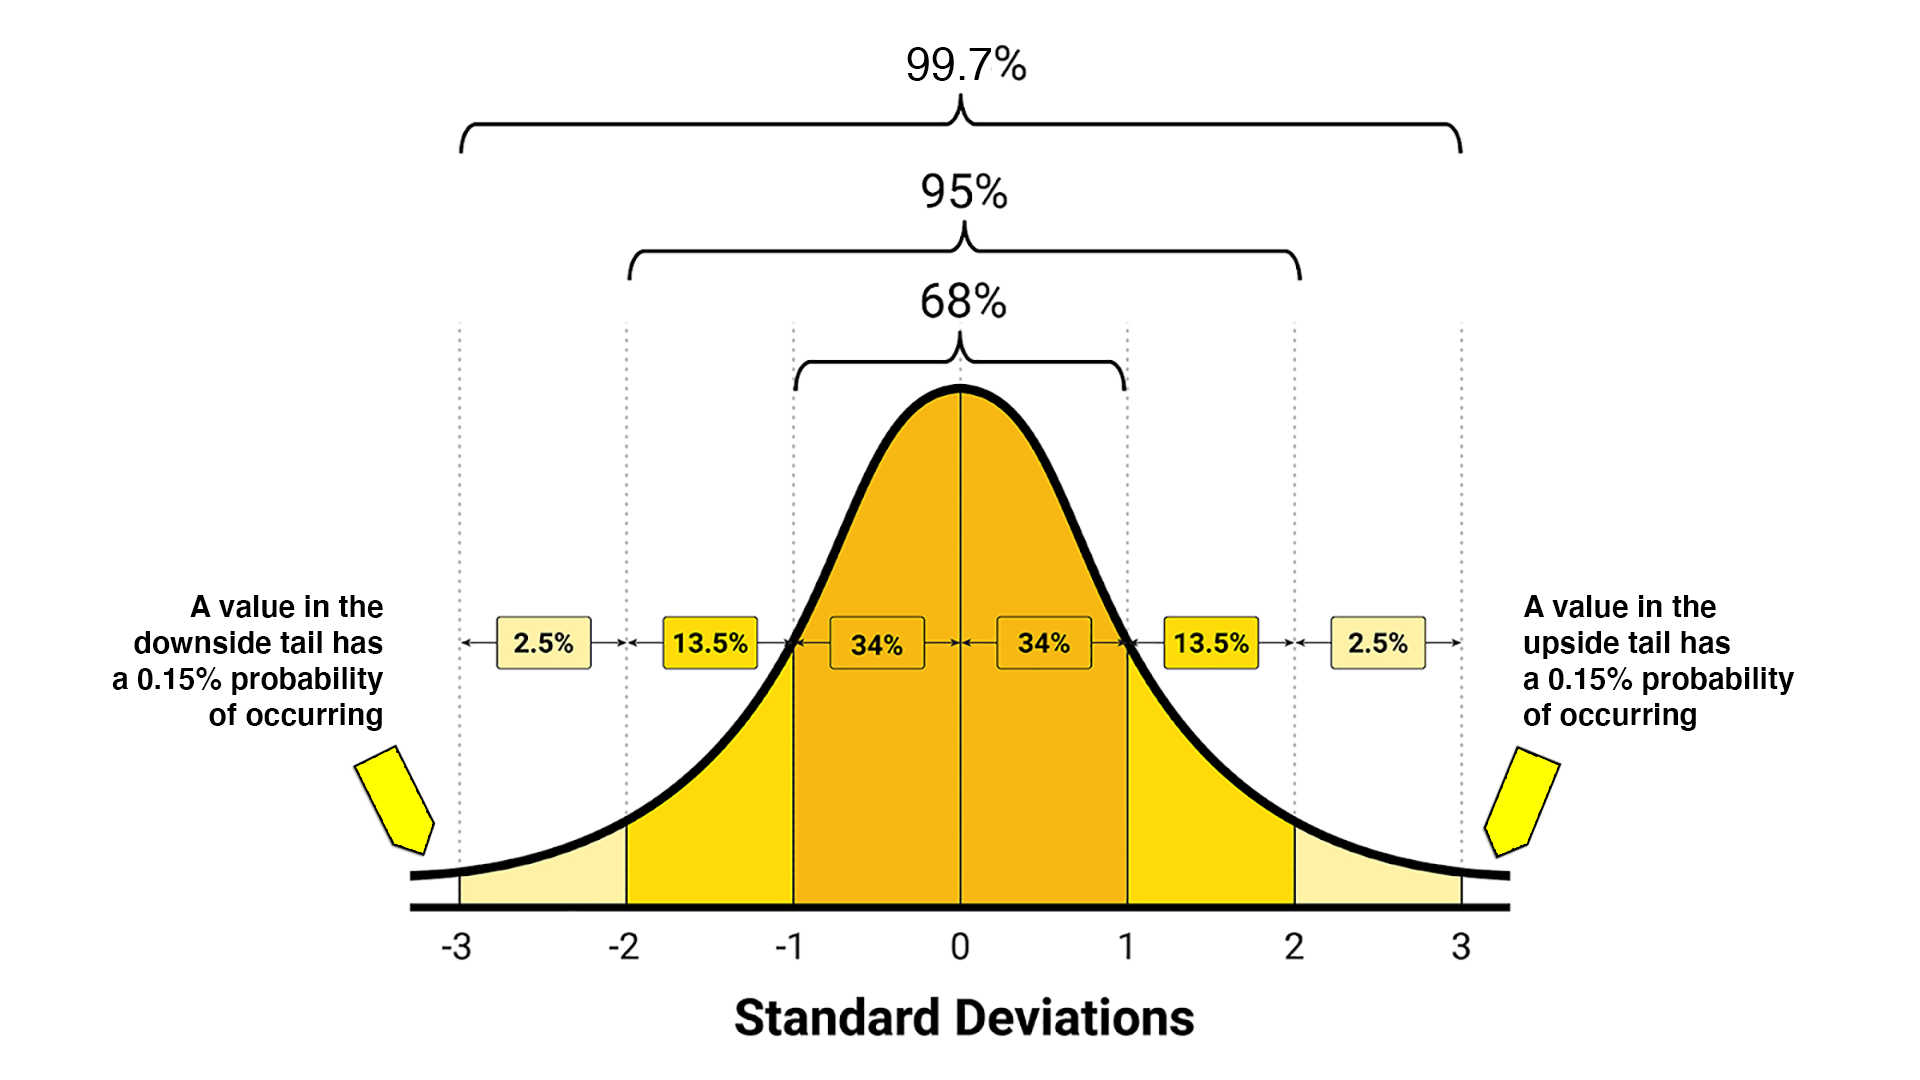

The tail risk arises from the probability that an event will move more than three standard deviations from the mean. Because three standard deviations cover about 99.7% of all occurrences, the probability of tail-risk events is only 0.3%.

To break this down even further, this means that events in the downside tail and those in the upside tail each have a probability of 0.15%. The downside tail includes values that are less than the mean value by more than three standard deviations. The upside tail includes values that are greater than the mean value by more than three standard deviations.

Great work! You can now make predictions about the future performance of stocks by using data from Alpaca API calls, Pandas functions, and statistical concepts—such as probability distributions, confidence intervals, and tail risks. However, two factors can influence our confidence in our confidence intervals—namely, time and size.

# Connect Performance to Time and Size.

Using statistics like probability distributions and confidence intervals, an analyst can measure the probability of a stock's expected performance. It would be great if these calculations always proved correct, but two factors influence their accuracy: time and size.

## Time

The further away you get from the time period that the start and end dates of a dataset define, the less accurate your predictions will be.

Let’s revisit the Zoom Video Communications stock data from May 1, 2019 to May 1, 2020, as the following image shows:

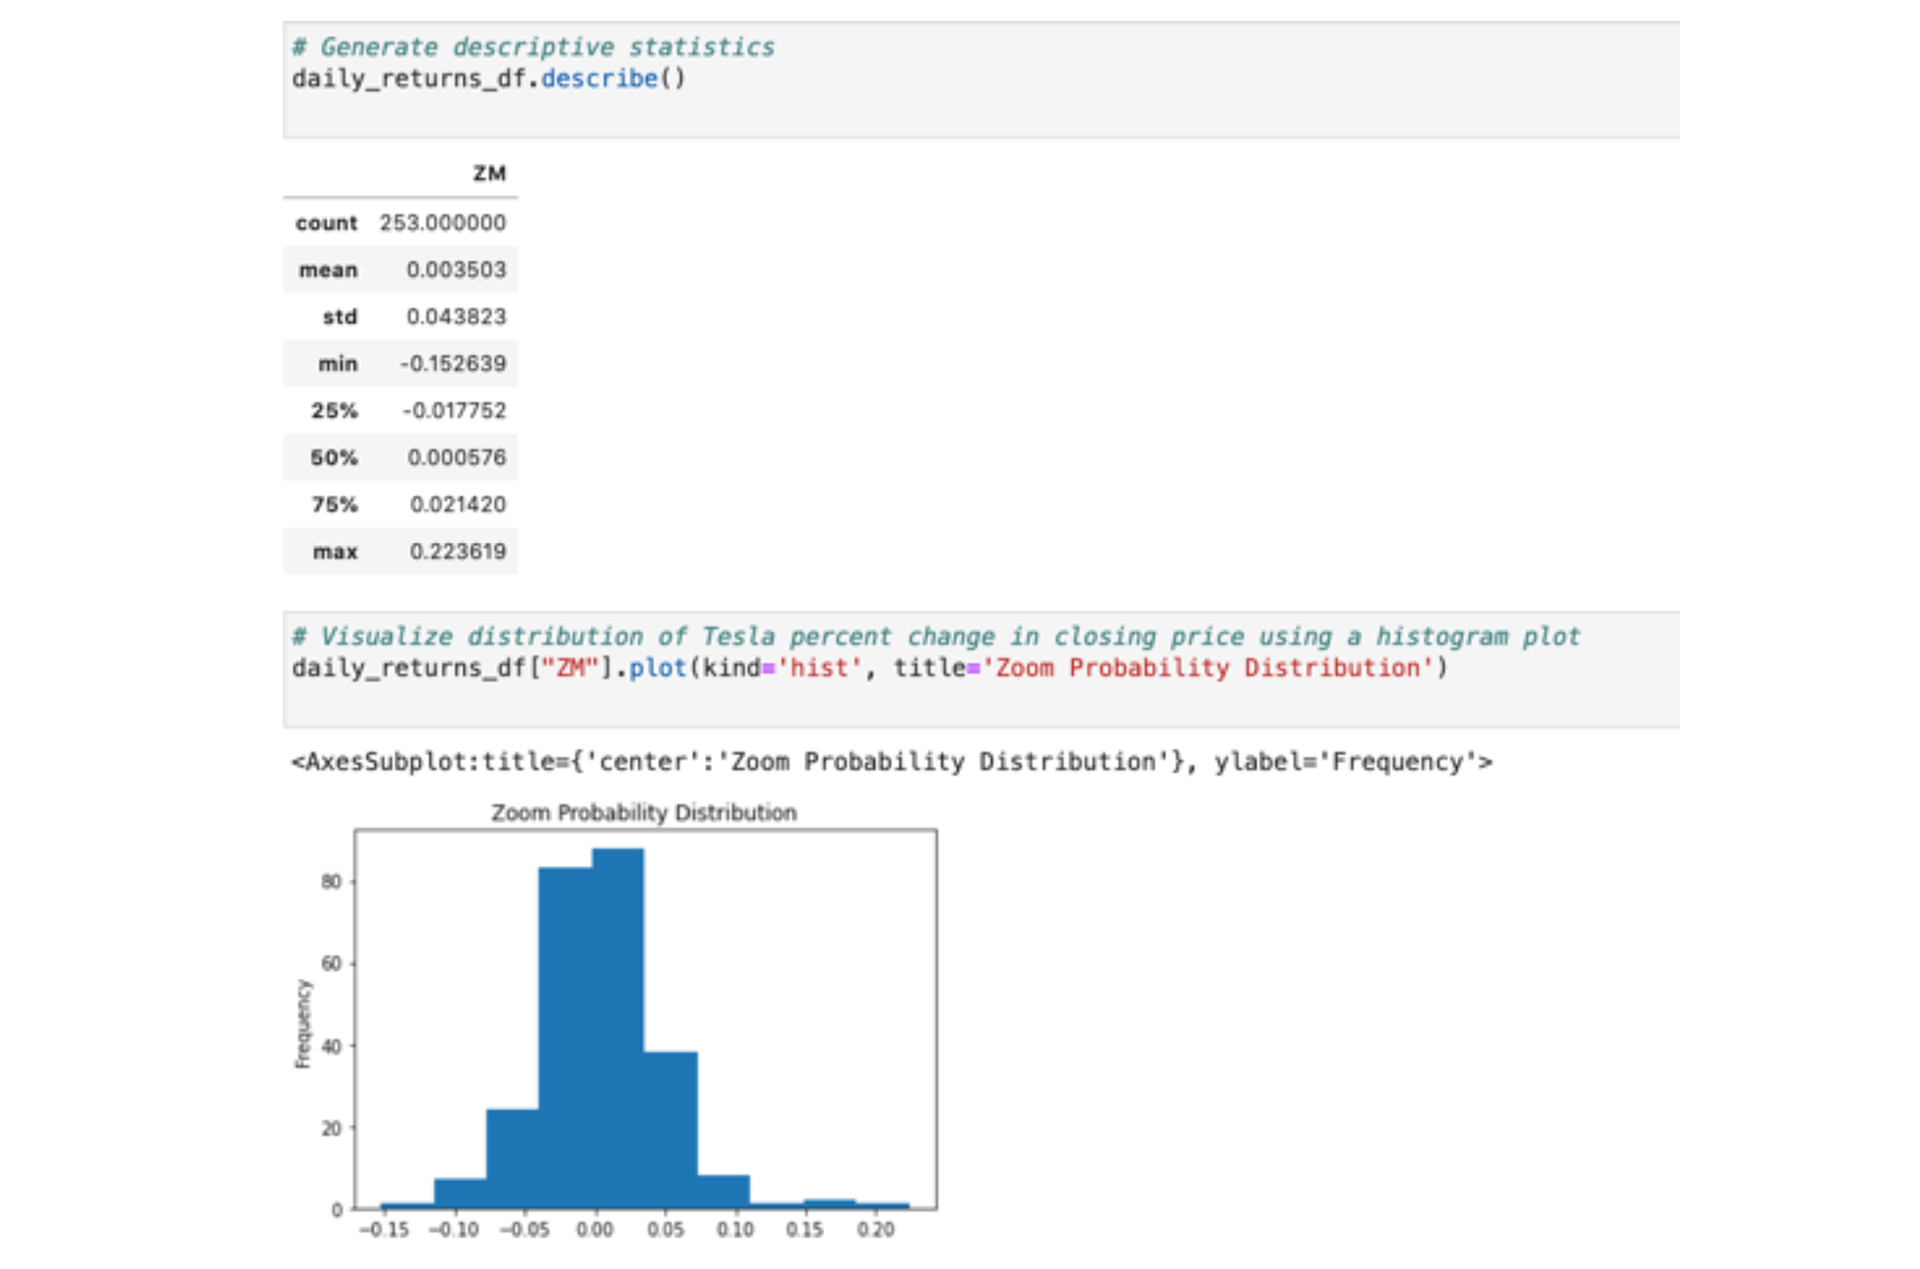

Any predictions based on this data should prove accurate through the first couple of weeks in May and possibly into June. Beyond that, the performance will most likely start to deviate from our calculations.

This is because stock markets aren’t static. A multitude of outside factors constantly influenced them. Some factors relate to the company or industry and others to politics and the larger economy—both domestic and international. These factors introduce randomness and variability into the markets, influencing how individual stocks perform every day. Therefore, the older a dataset is relative to the analysis date, the more randomness and variability we need to account for in performance calculations.

This is where APIs come into play. The ability to automate the retrieval of current information, like the closing price of a stock, allows for a more accurate analysis. It also ensures that your confidence in your confidence intervals remains high.

## Size

The second factor that influences the accuracy of an analysis is the size of the dataset. Smaller datasets don’t tend to generate accurate results, especially over the long term. This happens even if you work with the most up-to-date information that’s available.

Consider daily return data. If we do an analysis based on a dataset of only 30 closing prices, we can expect that our prediction will apply over only a short period. Only 30 days of data accounts for limited stock and market variability. It follows that the predictions will have a limited scope, as well.

Now, consider an analysis based on a dataset that spans a 10-year period. This analysis will likely include various market conditions and changing factors. Provided that the end date in the dataset is recent, the analysis will likely prove accurate for a longer period of time.

Size also applies to evaluating the performance expectations of a single stock vs. a portfolio of stocks. The deviation from the expected value of a portfolio is quite large, because it incorporates the range of performance possibilities for each asset in the portfolio. The more assets that the portfolio has, the more randomness and variability we need to account for.

Fortunately, we have sophisticated tools, like Monte Carlo simulations (which you’ll learn about in the next lesson). These account for the deviation across a portfolio of stocks and allow us to make predictions about future performance. But before we get to that excitement, it’s time for you to put together everything that you learned in this lesson and complete the following activity.

https://courses.bootcampspot.com/courses/800/pages/5-dot-2-6-activity-wrangling-the-range?module_item_id=235185